# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


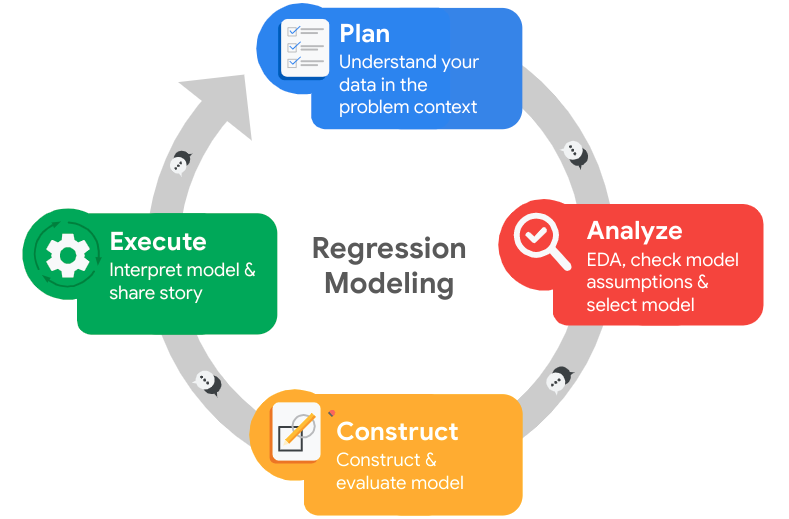

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below.

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. The stakeholders are the HR department.
2. To predict employees likely to quit.
3. All features are numeric except for Department and salary. Sales, technical, and support are the departments with the most people. 49% of salaries are low, 43% are medium, 8% are high (some are missing).
4. Python resources.
5. Only to make sure any models built accurately reflect the data.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [23]:
# Import data and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay  # for Logistic Regression

# stats libraries
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# logistic regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics # for confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Random forest
from sklearn.ensemble import RandomForestClassifier


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [54]:
# RUN THIS CELL TO IMPORT YOUR DATA.

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [25]:
# Gather basic information about the data
### YOUR CODE HERE ###
print(df0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


### Gather descriptive statistics about the data

In [26]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
print(df0.describe(include='all'))
print()
print(df0['Department'].value_counts(normalize=True))
print()
print(df0['salary'].value_counts(normalize=True))

        satisfaction_level  last_evaluation  number_project  \
count         14999.000000     14999.000000    14999.000000   
unique                 NaN              NaN             NaN   
top                    NaN              NaN             NaN   
freq                   NaN              NaN             NaN   
mean              0.612834         0.716102        3.803054   
std               0.248631         0.171169        1.232592   
min               0.090000         0.360000        2.000000   
25%               0.440000         0.560000        3.000000   
50%               0.640000         0.720000        4.000000   
75%               0.820000         0.870000        5.000000   
max               1.000000         1.000000        7.000000   

        average_montly_hours  time_spend_company  Work_accident          left  \
count           14999.000000        14999.000000   14999.000000  14999.000000   
unique                   NaN                 NaN            NaN           NaN   


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [55]:
# Display all column names
### YOUR CODE HERE ###
print(df0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [57]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'years_employed',
                          'Department': 'department',
                          'number_project': 'projects'})

# Add an overtime column since the mean average_monthly_hours = 200.
# It seems there is a lot of overtime work at this company
df0['overtime'] = np.where(df0['average_monthly_hours'] > 160, df0['average_monthly_hours'] - 160, 0)

# Since overtime and average_monthly_hours are highly correlated,
# let's keep overtime and drop average_monthly_hours
df0 = df0.drop(columns=['average_monthly_hours'])

# Display all column names after the update
### YOUR CODE HERE ###
print(df0.describe())

       satisfaction_level  last_evaluation      projects  years_employed  \
count        14999.000000     14999.000000  14999.000000    14999.000000   
mean             0.612834         0.716102      3.803054        3.498233   
std              0.248631         0.171169      1.232592        1.460136   
min              0.090000         0.360000      2.000000        2.000000   
25%              0.440000         0.560000      3.000000        3.000000   
50%              0.640000         0.720000      4.000000        3.000000   
75%              0.820000         0.870000      5.000000        4.000000   
max              1.000000         1.000000      7.000000       10.000000   

       work_accident          left  promotion_last_5years      overtime  
count   14999.000000  14999.000000           14999.000000  14999.000000  
mean        0.144610      0.238083               0.021268     46.547770  
std         0.351719      0.425924               0.144281     42.998482  
min         0.00000

### Check missing values

Check for any missing values in the data.

In [58]:
# Check for missing values
### YOUR CODE HERE ###
# check for missing data
print(df0.isna().sum())

satisfaction_level       0
last_evaluation          0
projects                 0
years_employed           0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
overtime                 0
dtype: int64


### Check duplicates

Check for any duplicate entries in the data.

In [59]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3151

In [60]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated(keep='first')]


,satisfaction_level,last_evaluation,projects,years_employed,work_accident,left,promotion_last_5years,department,salary,overtime
119,0.40,0.46,2,3,0,1,0,technical,low,0
121,0.40,0.46,2,3,0,1,0,technical,low,0
187,0.40,0.46,2,3,0,1,0,hr,medium,0
242,0.38,0.53,2,3,0,1,0,sales,low,0
243,0.40,0.50,2,3,0,1,0,sales,low,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,3,0,1,0,support,low,0
14995,0.37,0.48,2,3,0,1,0,support,low,0
14996,0.37,0.53,2,3,0,1,0,support,low,0
14997,0.11,0.96,6,4,0,1,0,support,low,120


In [61]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()

print(df1.shape)

# Display first few rows of new dataframe as needed
df1.head()

(11848, 10)


,satisfaction_level,last_evaluation,projects,years_employed,work_accident,left,promotion_last_5years,department,salary,overtime
0,0.38,0.53,2,3,0,1,0,sales,low,0
1,0.80,0.86,5,6,0,1,0,sales,medium,102
2,0.11,0.88,7,4,0,1,0,sales,medium,112
3,0.72,0.87,5,5,0,1,0,sales,low,63
4,0.37,0.52,2,3,0,1,0,sales,low,0


### Check outliers

Check for outliers in the data.

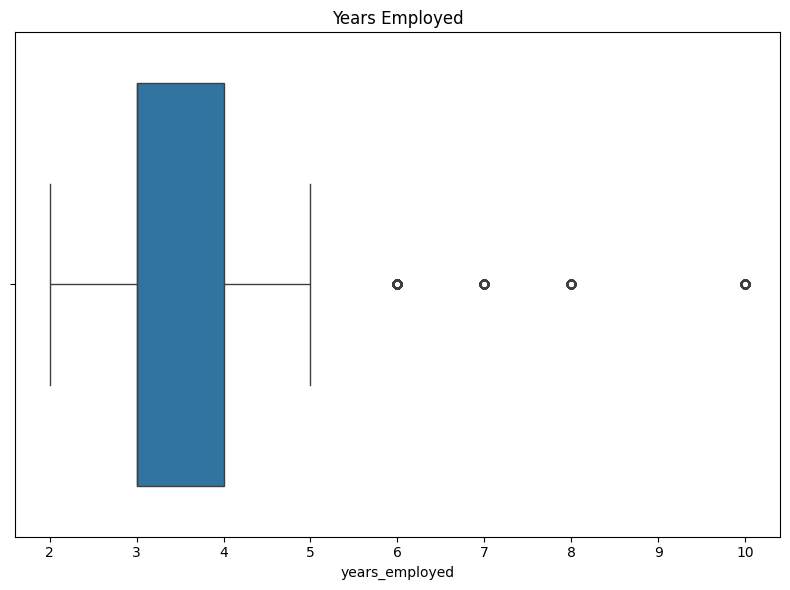

In [62]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.rcParams["figure.figsize"] = (8, 6)
sns.boxplot(x='years_employed', data=df1)
plt.title('Years Employed')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [63]:
# Determine the number of rows containing outliers
df1 = df1.copy()
df1.loc[:, 'z_score'] = stats.zscore(df1['years_employed'], ddof=1)
outliers = df1[(df1['z_score'] > 3) | (df1['z_score'] < -3)]

print("Number of outliers:", len(outliers))

print()
print(df1.info())

Number of outliers: 188

<class 'pandas.core.frame.DataFrame'>
Index: 11848 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11848 non-null  float64
 1   last_evaluation        11848 non-null  float64
 2   projects               11848 non-null  int64  
 3   years_employed         11848 non-null  int64  
 4   work_accident          11848 non-null  int64  
 5   left                   11848 non-null  int64  
 6   promotion_last_5years  11848 non-null  int64  
 7   department             11848 non-null  object 
 8   salary                 11848 non-null  object 
 9   overtime               11848 non-null  int64  
 10  z_score                11848 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 1.1+ MB
None


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. A correlation matrix suggests that satisfaction_level is the most important feature affecting whether someone leaves, followed by years_employed and accident.
2. Average monthly hours and projects are somewhat correlated. 16.6% of workers left.
3. Salary should be converted to ordinal values. Department should be one-hot encoded.
4. Discovering the distributions of each variable and correlations.
5. Documentation on scikit-learn, reference notes on seaborn charts. Most of these notes are in local text files. Some documentation on options are at: https://scikit-learn.org/stable/ and https://www.statsmodels.org/stable/user-guide.html.
6. The main concern I have about the data is that the "left" column includes people who quit and people who were let go. This muddies the cause of the outcomes. I would go to HR to see if I could separate those two categories of people.


## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [64]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True) * 100)

left
0    9997
1    1851
Name: count, dtype: int64
left
0    84.37711
1    15.62289
Name: proportion, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

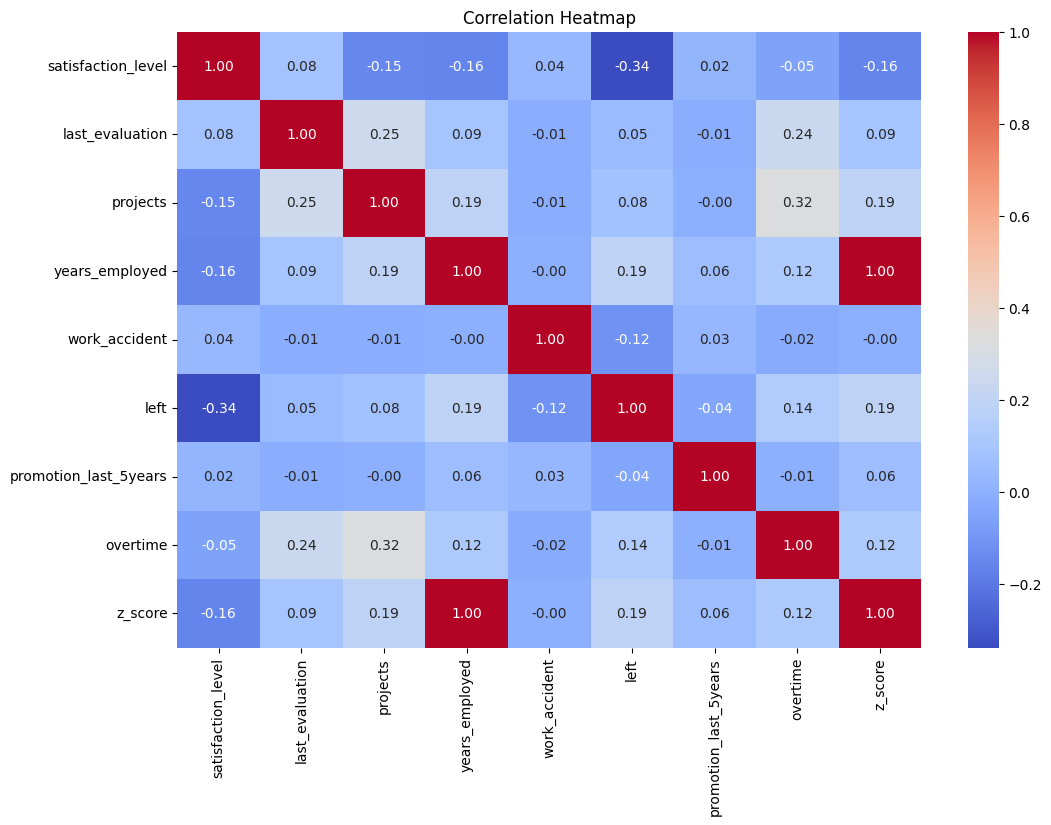

In [65]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(12, 8))
correlation_matrix = df1.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

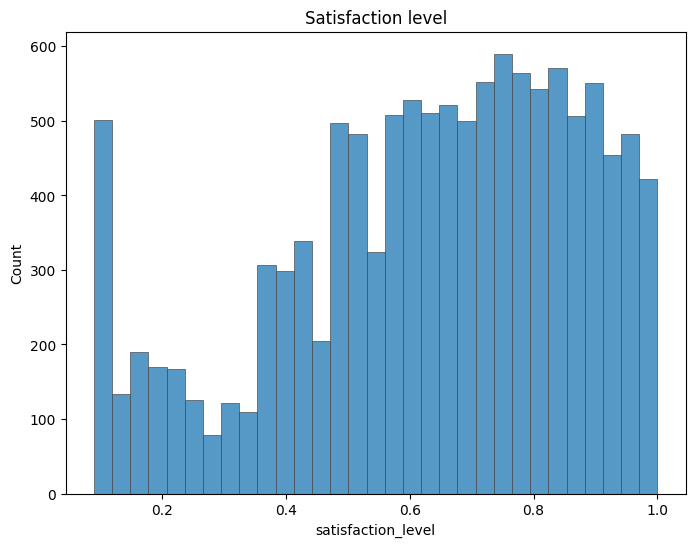

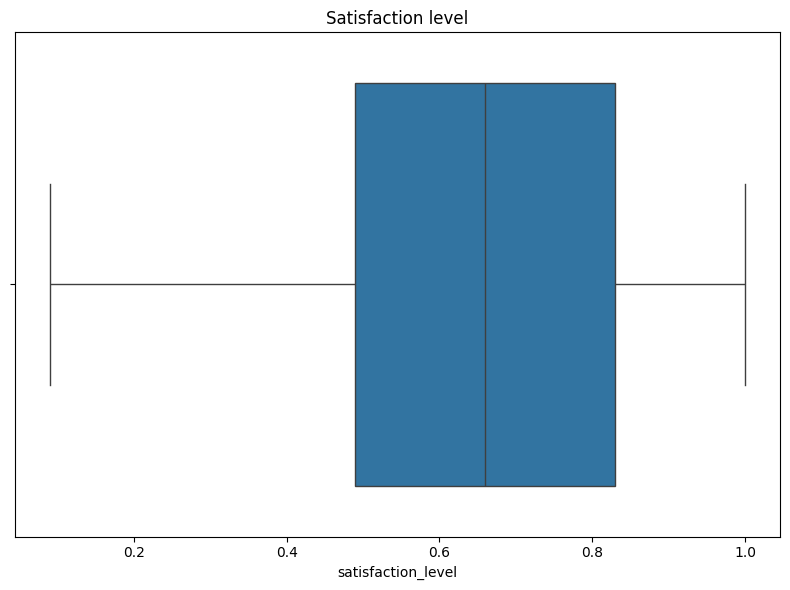

In [66]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8, 6))
sns.histplot(
    x=df1['satisfaction_level'],
    edgecolor=".3",
    linewidth=.5,
)
plt.title('Satisfaction level')
plt.show()

sns.boxplot(x='satisfaction_level', data=df1)
plt.title('Satisfaction level')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

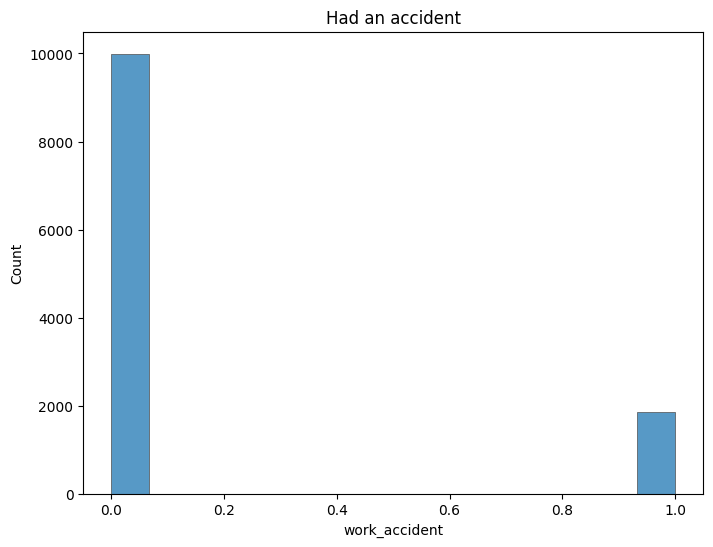

In [46]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(
    x=df1['work_accident'],
    edgecolor=".3",
    linewidth=.5,
)
plt.title('Had an accident')
plt.show()


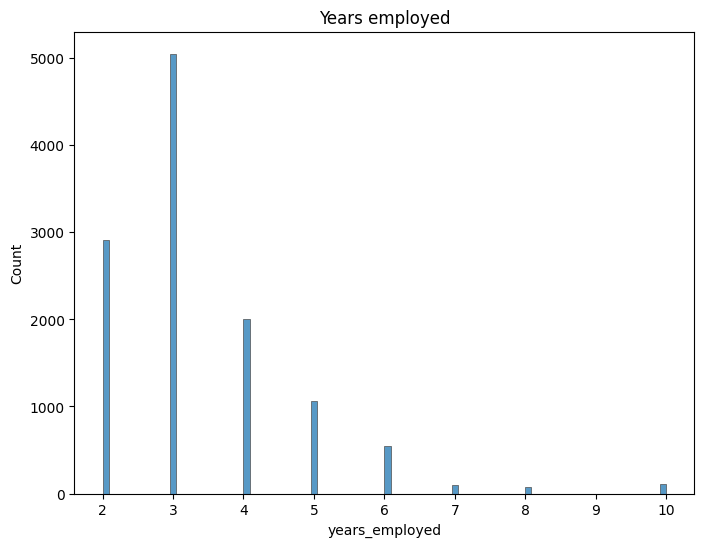

In [48]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(
    x=df1['years_employed'],
    edgecolor=".3",
    linewidth=.5,
)
plt.title('Years employed')
plt.show()

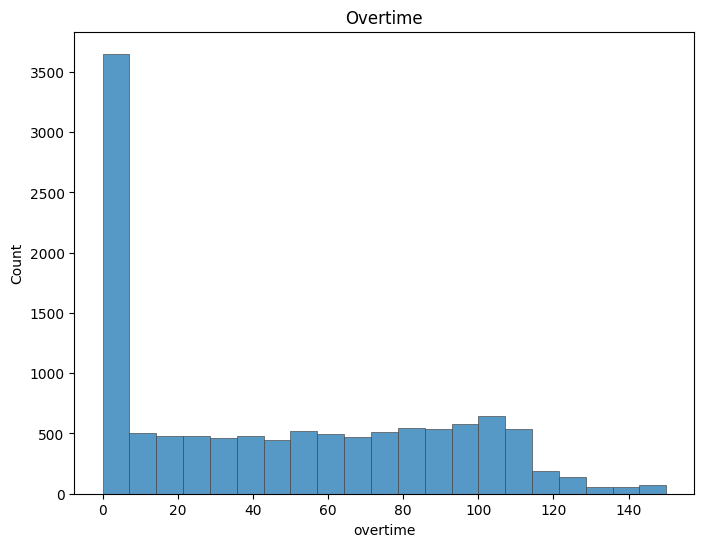

In [51]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(
    x=df1['overtime'],
    edgecolor=".3",
    linewidth=.5,
)
plt.title('Overtime')
plt.show()

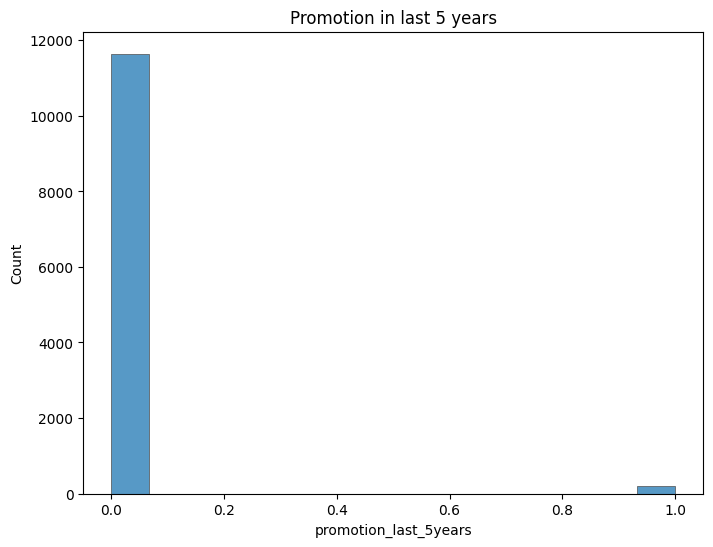

In [52]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(
    x=df1['promotion_last_5years'],
    edgecolor=".3",
    linewidth=.5,
)
plt.title('Promotion in last 5 years')
plt.show()

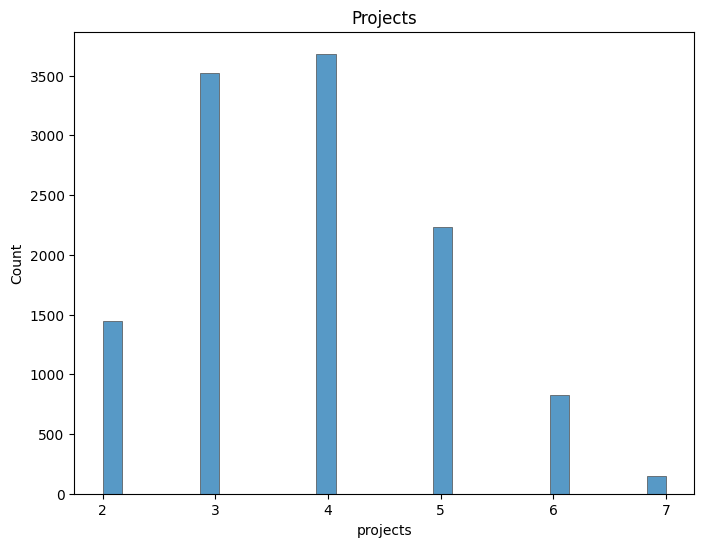

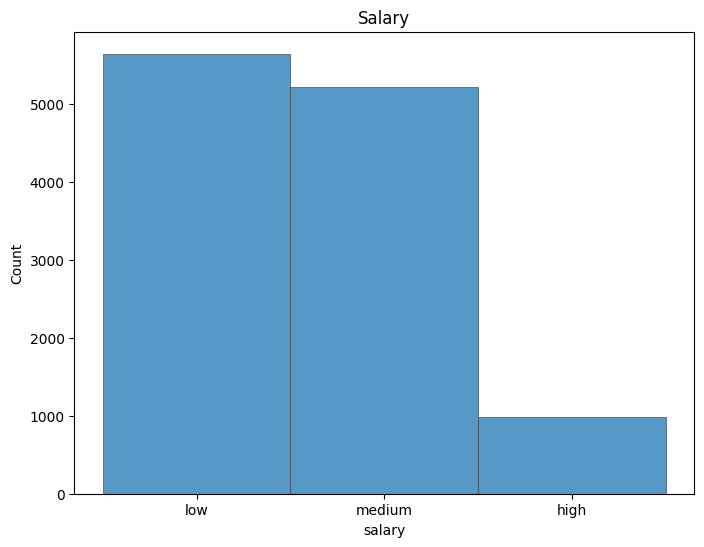

In [68]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(
    x=df1['projects'],
    edgecolor=".3",
    linewidth=.5,
)
plt.title('Projects')
plt.show()


sns.histplot(
    x=df1['salary'],
    edgecolor=".3",
    linewidth=.5,
)
plt.title('Salary')
plt.show()

In [71]:
# convert salary to ordinal values
df2 = df1.copy()
df2['salary'] = df2['salary'].map({"low": 1, "medium": 2, "high": 2})
print(df2['salary'].head())

# get dummies for department
df2 = pd.get_dummies(df2, columns=['department'], drop_first=True)
print(df2.info())

0    1
1    2
2    2
3    1
4    1
Name: salary, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 11848 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11848 non-null  float64
 1   last_evaluation         11848 non-null  float64
 2   projects                11848 non-null  int64  
 3   years_employed          11848 non-null  int64  
 4   work_accident           11848 non-null  int64  
 5   left                    11848 non-null  int64  
 6   promotion_last_5years   11848 non-null  int64  
 7   salary                  11848 non-null  int64  
 8   overtime                11848 non-null  int64  
 9   z_score                 11848 non-null  float64
 10  department_RandD        11848 non-null  bool   
 11  department_accounting   11848 non-null  bool   
 12  department_hr           11848 non-null  bool   
 13  department_management   11848 non-

In [72]:
# remove outliers in years_employed for logistic regression
outliers = df2[(df2['z_score'] > 3) | (df2['z_score'] < -3)]

# Keep only rows where z_score is between -3 and 3
df3 = df2[(df2['z_score'] <= 3) & (df2['z_score'] >= -3)]

#print(outliers)

# drop the z_score column
df3 = df3.drop(columns=['z_score'])


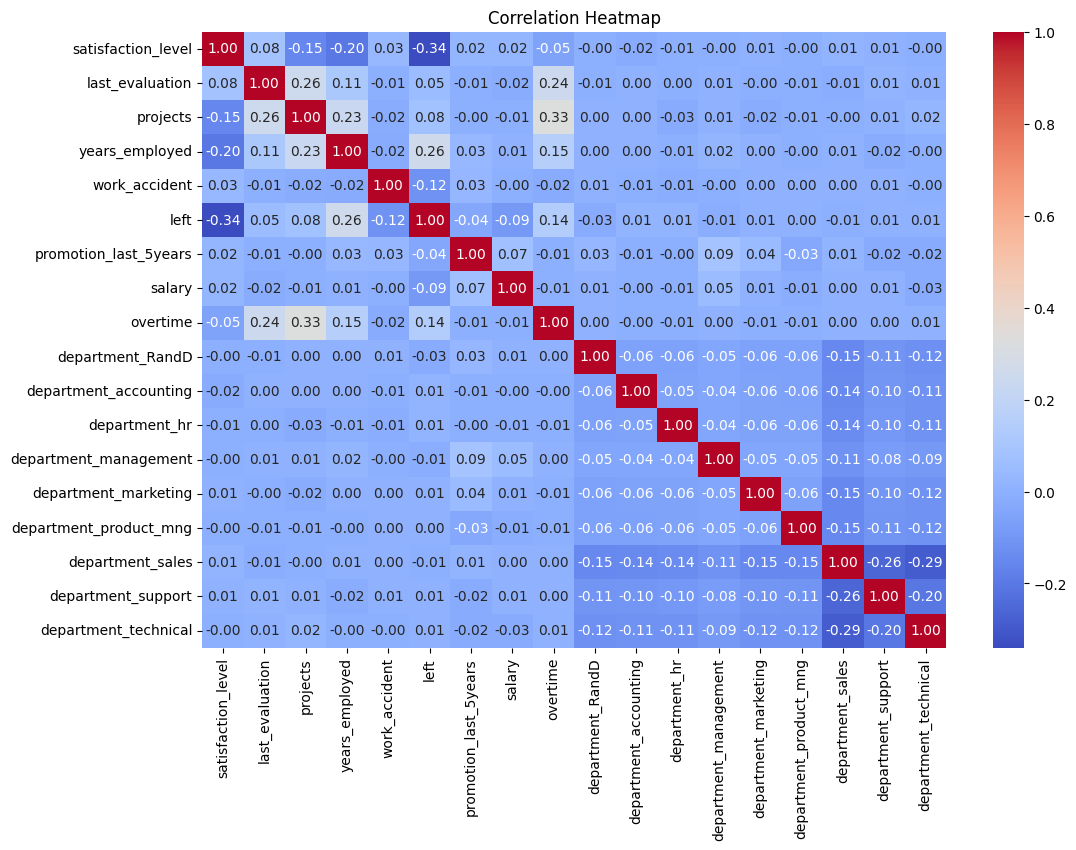

In [73]:
# run another correlation matrix to see how the departments and salaries relate to the left feature
plt.figure(figsize=(12, 8))
correlation_matrix = df3.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Insights

Very few people got promotions in the last 5 years.
A small percentage of people have a high salary.
Salary was converted to ordinal values (1=low, 2=medium, 3=high). Surprisingly, salary had a slight negative correlation with leaving the company. Dummy values were created for department.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Logistic Regression:
1. One odd thing I noticed was that salary had a negative correlation with people who left. I expected that a higher salary (3) would make someone less prone to leave.
2. For Logistic Regression, I left all of the variables in the model.
3. The assumptions for Logistic Regression were met.
4. The model does not fit very well. Too many false negatives.
5. It could be improved slightly by balancing the upscaling the training data, but I want to try a random forest first.
6. Using the same resources mentioned above.
7. The left column includes both quits and people who were let go.

Random Forest:
1. The feature importances were slightly different than with logistic regression.
2. I used all variables in the random forest, but max_features defaults to sqrt, so only a few features were used in individual trees before aggregation.
3. The assumptions for a random forest were met.
4. The random forest fits the data very well and made excellent predictions.
5. It might be improved with additional tuning, or using an XGBoostClassifier.
6. Using the same resources mentioned above.
7. The left column includes both quits and people who were let go.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The prediction is for a binary outcome. Either people leave (1) or they are retained (0).

I plan to use Logistic Regression as the model.
Also Random Forest Classifier.


### Identify the types of models most appropriate for this task.

Since the outcome is a binary classification and we have the data, I'll use a supervised model.

Models that are appropriate: Logistic Regression, RandomForestClassifier, XGBClassifier. Naive Bayes or a single Decision Tree would also work, but they are generally not as strong as the other models.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [75]:
### YOUR CODE HERE ###
# the outcomes are somewhat imbalanced (16% left, 82% stayed). If the results are not very good, I may come back
# and create a more balanced dataset (70-30) to see it improves the model.

# target variable
y = df3['left']

# remove target from independent variables
X = df3.copy()
X = X.drop(columns=['left'])

print(X.info())

# Create scaler
scaler = StandardScaler()

# Columns to scale
columns_to_scale = ['overtime', 'projects', 'years_employed']

# Scale the columns
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

# create train_test_split datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)



<class 'pandas.core.frame.DataFrame'>
Index: 11660 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11660 non-null  float64
 1   last_evaluation         11660 non-null  float64
 2   projects                11660 non-null  int64  
 3   years_employed          11660 non-null  int64  
 4   work_accident           11660 non-null  int64  
 5   promotion_last_5years   11660 non-null  int64  
 6   salary                  11660 non-null  int64  
 7   overtime                11660 non-null  int64  
 8   department_RandD        11660 non-null  bool   
 9   department_accounting   11660 non-null  bool   
 10  department_hr           11660 non-null  bool   
 11  department_management   11660 non-null  bool   
 12  department_marketing    11660 non-null  bool   
 13  department_product_mng  11660 non-null  bool   
 14  department_sales        11660 non-null  boo

## Logistic regression starts here

In [76]:
# fit the Logistic Regression model
clf = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train, y_train)


## Random forest model starts here

In [77]:
# Random Forest Classifier model
# note: I am using the same cleaned and scaled data as the logistic regression, but added cells for the random
# forest from this point forward.

rf = RandomForestClassifier(random_state=42)

# hyperparameters
tree_para = {'max_depth':[2,4,6,8,10],
             'min_samples_leaf': [2,3,5,10],
             'max_features': ['sqrt', None]}

scoring = ['accuracy', 'precision', 'recall', 'f1']

rfc = GridSearchCV(rf,
      tree_para,
      scoring = scoring,
      cv=5,
      refit="f1")


In [78]:
%%time
# fit the random forest with cross validation
rfc.fit(X_train, y_train)


CPU times: user 2min 24s, sys: 216 ms, total: 2min 24s
Wall time: 2min 24s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt', None],
                         'min_samples_leaf': [2, 3, 5, 10]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






In [80]:
# Get the predictions on test data
y_preds = clf.predict(X_test)

# print scoring
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_preds))
print('Precision:', '%.3f' % precision_score(y_test, y_preds))
print('Recall:', '%.3f' % recall_score(y_test, y_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, y_preds))
print('AUC:', '%.3f' % metrics.roc_auc_score(y_test,y_preds))

accuracy = accuracy_score(y_test, y_preds)

# Store results for later comparison
# Create table of results
table = pd.DataFrame()

# Create table of results
table = pd.DataFrame({'Model': "Logistic Regression",
                      'F1': [accuracy_score(y_test, y_preds)],
                      'Recall': [recall_score(y_test, y_preds)],
                      'Precision': [precision_score(y_test, y_preds)],
                      'Accuracy': [accuracy_score(y_test, y_preds)]
                     })

clf_table = table
print(clf_table)


Accuracy: 0.843
Precision: 0.510
Recall: 0.227
F1 Score: 0.314
AUC: 0.593
                 Model        F1    Recall  Precision  Accuracy
0  Logistic Regression  0.842539  0.226782   0.509709  0.842539


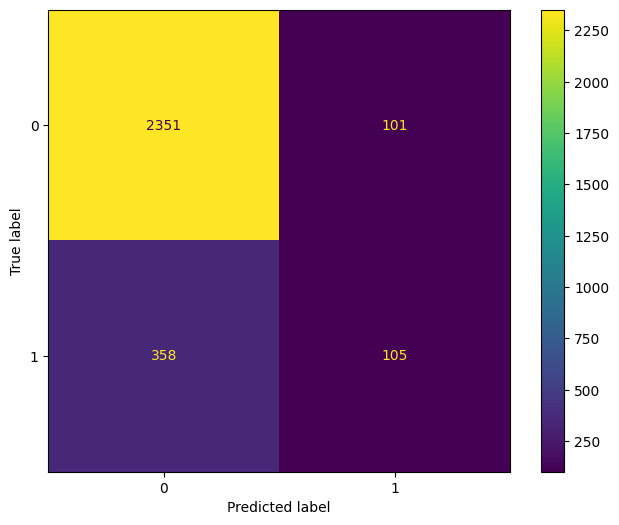

In [81]:
# create a confusion matrix with the trained classifier
# predictions are done in the plot function

def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate).
    Return a plot of confusion matrix for predictions on y data.
    '''

    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
        display_labels=model.classes_)
    disp.plot(values_format='') # values_format='' suppresses scientific notation
    plt.show()

conf_matrix_plot(clf, X_test, y_test)

Logistic Regression feature importances:
                   feature  importance
0       satisfaction_level    3.555381
4            work_accident    1.222450
5    promotion_last_5years    0.888881
1          last_evaluation    0.725678
3           years_employed    0.582131
6                   salary    0.525617
8         department_RandD    0.441512
2                 projects    0.320915
7                 overtime    0.281400
12    department_marketing    0.146103
11   department_management    0.127696
14        department_sales    0.096773
10           department_hr    0.058178
15      department_support    0.045995
16    department_technical    0.014890
9    department_accounting    0.012551
13  department_product_mng    0.007179


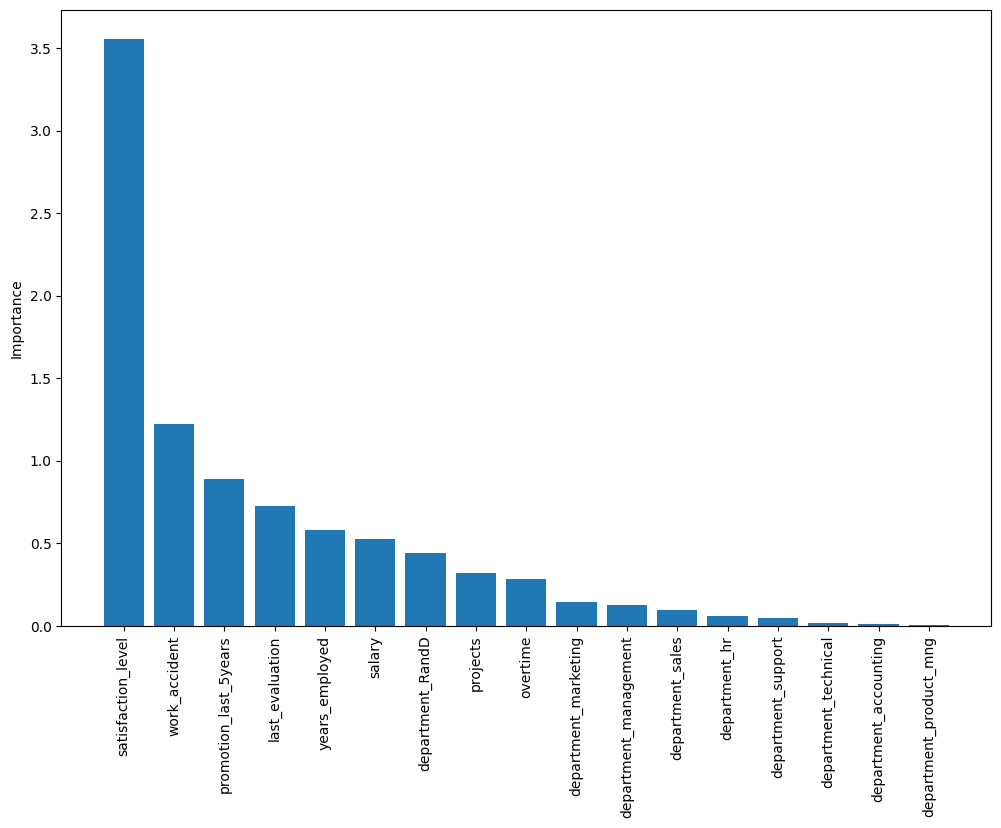

In [82]:
# get feature importance from coefficients
importance = abs(clf.coef_[0])
# Create dataframe of features and their importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importance})
# Sort by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("Logistic Regression feature importances:")
print(feature_importance)

plt.figure(figsize=(12, 8))
plt.bar(x=feature_importance['feature'], height=feature_importance['importance'])
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()

## Random forest evaluation starts here


In [83]:
# Random Forest Classifier continues here for evalutaion

print("Best estimator:", rfc.best_estimator_)

print("Best Avg. Validation Score: ", "%.4f" % rfc.best_score_)


Best estimator: RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                       random_state=42)
Best Avg. Validation Score:  0.9447


In [84]:
# Store results for later comparison
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

rfc_table = make_results("Tuned Random Forest", rfc)
result_table = pd.concat([clf_table, rfc_table], ignore_index=True)
print(result_table)



                 Model        F1    Recall  Precision  Accuracy
0  Logistic Regression  0.842539  0.226782   0.509709  0.842539
1  Tuned Random Forest  0.944742  0.912825   0.979155  0.983076


<Figure size 1000x800 with 0 Axes>

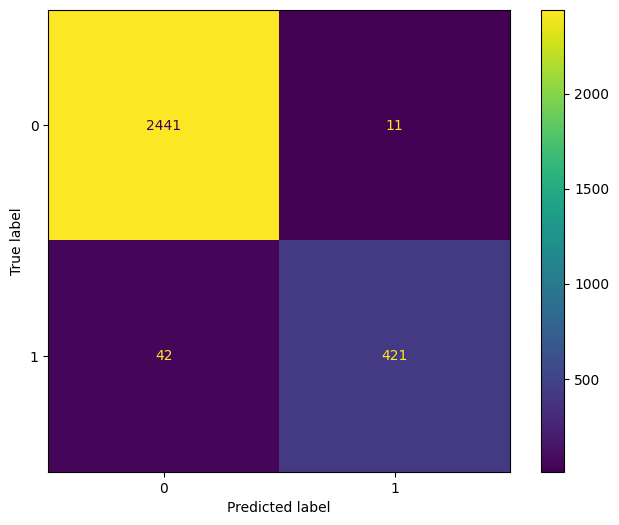

In [85]:
# create a confusion matrix with the trained classifier
# predictions are done in the plot function

def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate).
    Return a plot of confusion matrix for predictions on y data.
    '''

    model_pred = model.predict(x_data)
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
        display_labels=model.classes_)
    disp.plot(values_format='') # values_format='' suppresses scientific notation
    plt.show()

conf_matrix_plot(rfc, X_test, y_test)

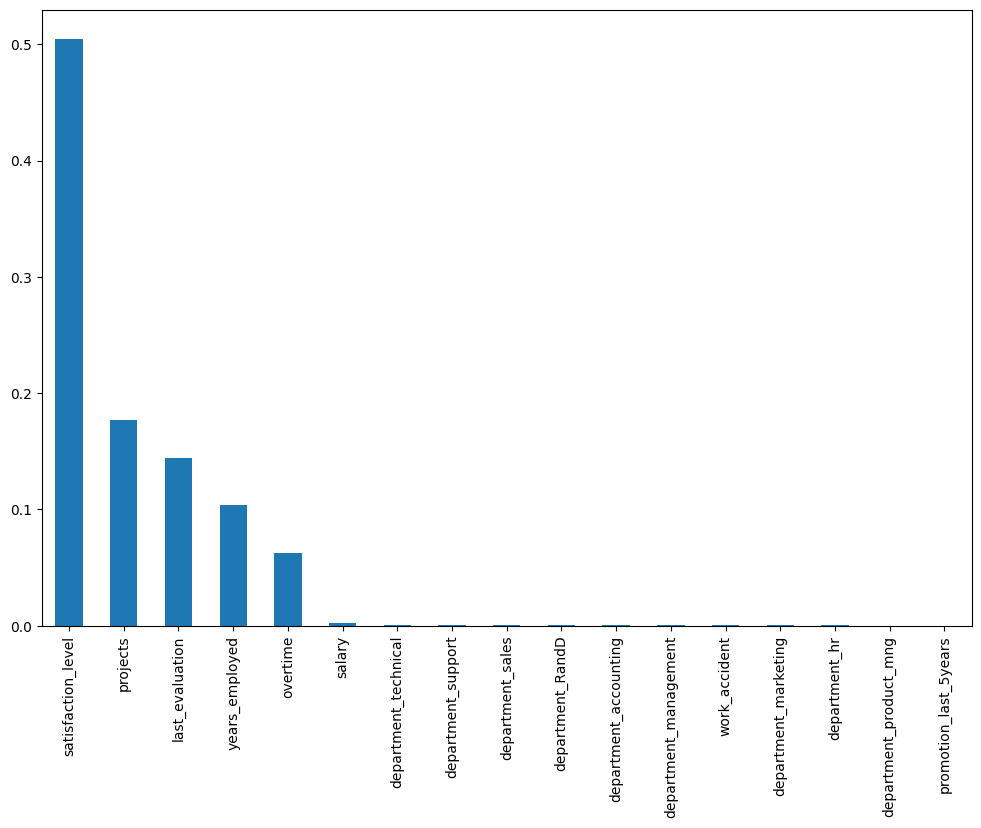

In [87]:
# Plot feature importances
importances = rfc.best_estimator_.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
forest_importances.plot.bar(ax=ax);

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



For Logistic Regression:
1. The top three importances were satisfaction_level, accident, and promotion_last_5_years. The last one surprised me based on the initial correlation matrix.
2. Precision, recall, and F1 scores were poor. There were a lot of false negatives that make the model not very effective. It should not be used in production.
3. I want to try a RandomForestClassifier to see it is more accurate.
4. Logistic regression is not capturing the non-linear relationships very well. It probably cannot be improved enough to be useful.

For RandomForestClassifier:
1. The top three importances were satisfaction_level, projects, and last_evaluation. These are quite different than the logistic regression model.
2. All metrics are greatly improved over logistic regression. This model is the champion.
3. The random forest model works very well and I would recommend that HR use the model to imrpove retention.
4. It might be improved with a separation of the "left" reasons into quits and fires. An XGBClassifier might perform better.
5. It might be improved with a separation of the "left" variable into quits and fires.
6. Same resources as above.
7. Only the combination of quits and hires into the left variable.

Recommendations:
The random forest model appears highly accurate with low false positives and low false negatives. It is good enough to make useful predictions and suggest areas to focus on to improve employee retention.

It could still be improved if we had a break out of the left feature into quits and fires.

It is possible an XGBClassifier could improve metrics.

I used the same resources as before (notes, previously built models, web documentation).

Concerns:
The main concern is the combination of quits and fires in the same bucket.



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Logistic regression was not accurate enough to make useful predictions.

The random forest model produced a highly performant model with accurate predictions.



### Conclusion, Recommendations, Next Steps

I recommend deploying the random forest model so HR can use it to address the issue of employees turnover.

Possible policy changes include reducing the number of projects for people with many, and reducing overtime. Overtime mean and median were very high across an entire company.

The model might be further improved by getting granular data on the reason for a separation. Additonal models can be tested to see if they can improve performance.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.